In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
ClimateDBengine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
ClimateDB = automap_base()
# reflect the tables
ClimateDB.prepare(ClimateDBengine, reflect=True)

In [6]:
# View all of the classes that automap found
ClimateDB.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
ClimateDBStation = ClimateDB.classes.station
ClimateDBMeasurement = ClimateDB.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(ClimateDBengine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
datemostrecent = session.query(ClimateDBMeasurement.date).order_by(ClimateDBMeasurement.date.desc()).first()
print("Most Recent Date: " + str(datemostrecent))

Most Recent Date: ('2017-08-23',)


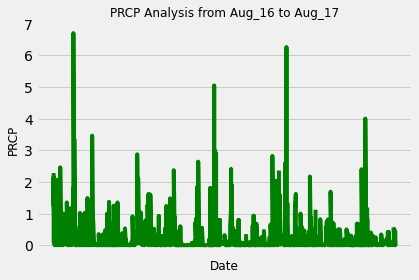

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
mostrecentdata = dt.date(2017,8, 23) - dt.timedelta(days = 365)
climateprecip = session.query(ClimateDBMeasurement.date, ClimateDBMeasurement.prcp).filter(ClimateDBMeasurement.date > mostrecentdata).\
order_by(ClimateDBMeasurement.date).all()
climateprecip
# Save the query results as a Pandas DataFrame and set the index to the date column
climateprecipDF = pd.DataFrame(climateprecip)
climateprecipDF1 = climateprecipDF.set_index('date')
climateprecipDF1
# Sort the dataframe by date
climateprecipDF2 = climateprecipDF1.sort_index(ascending = True)
climateprecipDF2
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(climateprecipDF2.index, climateprecipDF2['prcp'], color='green')
plt.title('PRCP Analysis from Aug_16 to Aug_17', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PRCP', fontsize=12)
plt.xticks([])
plt.grid(True)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climateprecipDF2.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
TotalNumberStations = session.query(ClimateDBStation).count()
print("Total Number Stations: " + str(TotalNumberStations))

Total Number Stations: 9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

ClimateActiveStations = (session.query(ClimateDBMeasurement.station, 
                         func.count(ClimateDBMeasurement.station)).\
                         group_by(ClimateDBMeasurement.station).order_by(func.count(ClimateDBMeasurement.station).desc()).all())
for cont1, cont2 in ClimateActiveStations:
    print("Station: " + cont1 + " has " + str(cont2) + " rows")

Station: USC00519281 has 2772 rows
Station: USC00519397 has 2724 rows
Station: USC00513117 has 2709 rows
Station: USC00519523 has 2669 rows
Station: USC00516128 has 2612 rows
Station: USC00514830 has 2202 rows
Station: USC00511918 has 1979 rows
Station: USC00517948 has 1372 rows
Station: USC00518838 has 511 rows


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MostActiveStation = ClimateActiveStations [0][0]
MostActiveStation

ClimateTobs = (session.query(ClimateDBMeasurement.station, ClimateDBMeasurement.date, ClimateDBMeasurement.tobs).\
    filter(ClimateDBMeasurement.station == MostActiveStation))
ClimateTobsDF = pd.DataFrame(ClimateTobs)
ClimateTobsDF
column = ClimateTobsDF["tobs"]
max_value = column.max()
min_value = column.min()
mean_value = column.mean()

print("Most Active Station: " + MostActiveStation)
print("Max Temp: " + str(max_value))
print("Min Temp: " + str(min_value))
print("Mean Temp: " + str(round(mean_value,2)))

Most Active Station: USC00519281
Max Temp: 85.0
Min Temp: 54.0
Mean Temp: 71.66


Text(0, 0.5, 'Observations')

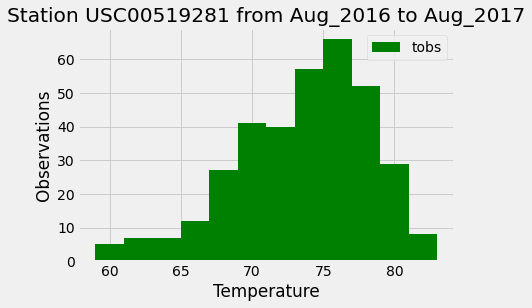

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ClimateTobsLastYear = (session.query(ClimateDBMeasurement.station, ClimateDBMeasurement.date, ClimateDBMeasurement.tobs).\
    filter(ClimateDBMeasurement.station == MostActiveStation).\
    filter(ClimateDBMeasurement.date > mostrecentdata).order_by(ClimateDBMeasurement.date).all())                                    
ClimateTobsLastYearDF = pd.DataFrame(ClimateTobsLastYear)
ClimateTobsLastYearDF

ClimateTobsLastYearDF.set_index('date')
ClimateTobsLastYearDF.plot.hist(bins = 12, color='green')
plt.title("Station USC00519281 from Aug_2016 to Aug_2017")
plt.xlabel("Temperature")
plt.ylabel("Observations")



In [16]:
# Close Session
session.close()